In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import json, os, glob, re

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}']

from matplotlib import rc
rc("text", usetex=False)

from experiments_mnist import get_exp_results

import seaborn as sns
sns.set_style("whitegrid")

/tmp/ipykernel_103884/933567937.py:9: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [


# MNIST experiment demo

In [2]:
# ***** Extract MNIST data features first before running the demo in this cell. Instructions for extracting 
# image features are in the ../README.md file *************************************************************#

results_log = get_exp_results(alpha = 1.0, seed=0, lamda=1, extractor='mlp', transf_type='colored', 
                              dataset='mnist', eta=0.95)

print("Results on data with spurious correlations between image labels and style related features in the data:")
print("Baseline in-distribution accuracy: ",results_log['baseline_indist_accuracy_sp_corr'])
print("Baseline out-of-distribution accuracy: ",results_log['baseline_ood_accuracy_sp_corr'])
print()
print("PISCO in-distribution accuracy: ",results_log['PISCO_indist_accuracy_sp_corr'])
print("PISCO out-of-distribution accuracy: ",results_log['PISCO_ood_accuracy_sp_corr'])


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Results on data with spurious correlations between image labels and style related features in the data:
Baseline in-distribution accuracy:  0.9332
Baseline out-of-distribution accuracy:  0.0022

PISCO in-distribution accuracy:  0.9083
PISCO out-of-distribution accuracy:  0.5473


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
path = './results/results_mnist/'

list_dir = []

for file in glob.glob(path + '*.json'):
    with open(file) as f:
        data = json.load(f)
        list_dir.append(data)
        
df = pd.DataFrame(list_dir)
# print(df.columns)
# df

# Plot

In [4]:
keys = ['dataset','extractor','transformation_type','alpha', 'lamda']
measure = ['baseline_ood_accuracy_sp_corr', 'PISCO_ood_accuracy_sp_corr']
variables = {}
for index in measure:
    variables[index] = ['mean', 'std']
summary = df.groupby(keys, as_index=False).agg(variables)
summary_lamda0 = summary[summary.lamda==0]
summary_lamda1 = summary[summary.lamda==1]
summary_lamda10 = summary[summary.lamda==10]
summary_lamda50 = summary[summary.lamda==50]


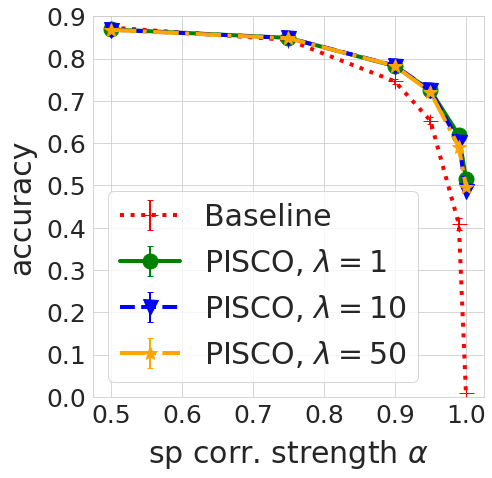

In [6]:
import numpy as np
import matplotlib.pyplot as plt 

baseline_ood_accuracy_mean = list(summary_lamda10.baseline_ood_accuracy_sp_corr["mean"])
lamda1_PISCO_ood_accuracy_mean = list(summary_lamda1.PISCO_ood_accuracy_sp_corr["mean"])
lamda10_PISCO_ood_accuracy_mean = list(summary_lamda10.PISCO_ood_accuracy_sp_corr["mean"])
lamda50_PISCO_ood_accuracy_mean = list(summary_lamda50.PISCO_ood_accuracy_sp_corr["mean"])

baseline_ood_accuracy_std = list(summary_lamda10.baseline_ood_accuracy_sp_corr["std"])
lamda1_PISCO_ood_accuracy_std = list(summary_lamda1.PISCO_ood_accuracy_sp_corr["std"])
lamda10_PISCO_ood_accuracy_std = list(summary_lamda10.PISCO_ood_accuracy_sp_corr["std"])
lamda50_PISCO_ood_accuracy_std = list(summary_lamda50.PISCO_ood_accuracy_sp_corr["std"])


x= summary.alpha.unique()
y_means = np.array([baseline_ood_accuracy_mean, lamda1_PISCO_ood_accuracy_mean, lamda10_PISCO_ood_accuracy_mean,lamda50_PISCO_ood_accuracy_mean])
y_stds = np.array([baseline_ood_accuracy_std, lamda1_PISCO_ood_accuracy_std, lamda10_PISCO_ood_accuracy_std, lamda50_PISCO_ood_accuracy_std])

labels = ["Baseline", 'PISCO,'+r' $\lambda = 1$','PISCO,'+r' $\lambda = 10$', 'PISCO,'+r' $\lambda = 50$']


colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
linestyles = ['-', '--', '-.', ':']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['+','o', 'v', '*', 'x', 's','p']
style = {"linewidth":4, "markeredgewidth":1, "elinewidth":2, "capsize":3}

x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i],color=colors[i], label=labels[i], marker=markers[i],markersize=15, **style)
    plt.rcParams['lines.linestyle'] = linestyles[i]
plt.legend(loc='lower left', prop={'size': 30})


plt.xlabel(r'sp corr. strength $\alpha$', size=30, labelpad=10)
plt.ylabel(r'accuracy', size=30, labelpad=10)
plt.ylim(0, 0.9)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.savefig('./plots/color-MNIST_MLP.png', dpi=300, bbox_inches='tight')
plt.show()